In [18]:
import pyxtal

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv("cdvae/data/mp_20/train.csv")

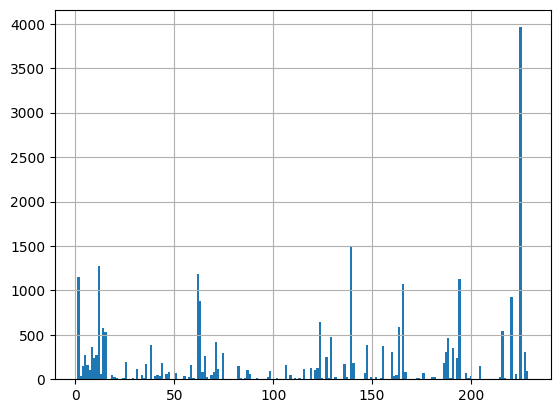

In [21]:
data['spacegroup.number'].hist(bins=200);

In [22]:
sum(data['spacegroup.number']==1)

470

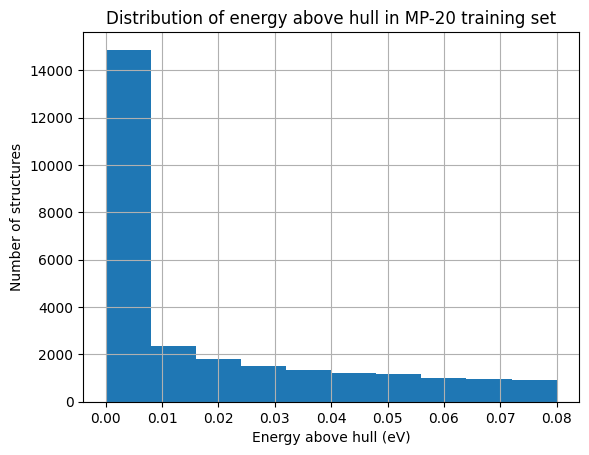

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data['e_above_hull'].hist(ax=ax)
ax.set_xlabel('Energy above hull (eV)')
ax.set_ylabel('Number of structures')
ax.set_title('Distribution of energy above hull in MP-20 training set')
fig.show()

In [24]:
pyxtal.__version__

'0.6.4'

In [26]:
g=pyxtal.Group(181)
g

-- Spacegroup --# 181 (P6422)--
12k	site symm: 1
6j	site symm: . 2 .
6i	site symm: . 2 .
6h	site symm: . 2 .
6g	site symm: . 2 .
6f	site symm: 2 . .
6e	site symm: 2 . .
3d	site symm: 2 22 .
3c	site symm: 2 22 .
3b	site symm: 2 22 .
3a	site symm: 2 22 .

In [38]:
g[9].equivalent_set(9)

Wyckoff position 3b in space group 181 with site symmetry 2 22 .
0, 0, 1/2
0, 0, 5/6
0, 0, 1/6

In [36]:
g[10].equivalent_set(9)

Wyckoff position 3b in space group 181 with site symmetry 2 22 .
0, 0, 1/2
0, 0, 5/6
0, 0, 1/6

In [31]:
g[8]

Wyckoff position 3c in space group 181 with site symmetry 2 22 .
1/2, 0, 0
0, 1/2, 1/3
1/2, 1/2, 2/3

In [54]:
g[9]

Wyckoff position 3b in space group 181 with site symmetry 2 22 .
0, 0, 1/2
0, 0, 5/6
0, 0, 1/6

In [4]:
g.Wyckoff_positions[-1]

Wyckoff position 3a in space group 181 with site symmetry 2 22 .
0, 0, 0
0, 0, 1/3
0, 0, 2/3

In [5]:
g.Wyckoff_positions[-2]

Wyckoff position 3b in space group 181 with site symmetry 2 22 .
0, 0, 1/2
0, 0, 5/6
0, 0, 1/6

In [28]:
g.wyckoffs_organized[3]

IndexError: list index out of range

In [47]:
?g.list_wyckoff_combinations([6])

Object `g.list_wyckoff_combinations([6])` not found.


In [60]:
w=g.Wyckoff_positions[10]

In [61]:
w

Wyckoff position 3a in space group 181 with site symmetry 2 22 .
0, 0, 0
0, 0, 1/3
0, 0, 2/3

In [65]:
w.equivalent_set(6)

ValueError: Spg 181, Invalid switch in Wyckoff Pos
Wyckoff position 3a in space group 181 with site symmetry 2 22 .
0, 0, 0
0, 0, 1/3
0, 0, 2/3
Wyckoff position 6e in space group 181 with site symmetry 2 . .
0, 0, z
0, 0, z+1/3
0, 0, z+2/3
0, 0, -z+1/3
0, 0, -z
0, 0, -z+2/3

In [27]:
??w.equivalent_set

Signature: w.equivalent_set(index)
Source:   
    def equivalent_set(self, index):
        """
        Transform the wp to another equivalent set.
        Needs to update both wp and positions

        Args:
            transformation: index
        """
        if self.index > 0:
            G = Group(self.number)
            if len(G[index]) != len(G[self.index]):
                msg = "Spg {:d}, Invalid switch in Wyckoff Pos\n".format(self.number)
                msg += str(self)
                msg += "\n"+str(G[index])
                raise ValueError(msg)
            else:
                return G[index]
        return self
File:      ~/.cache/pypoetry/virtualenvs/wyckofftransformer-FeCwefly-py3.10/lib/python3.10/site-packages/pyxtal/symmetry.py
Type:      method

In [5]:
summands_193 = {
    "l": 24,
    "k": 12,
    "j": 12,
    "i": 12,
    "h": 8,
    "g": 6,
    "f": 6,
    "e": 4,
    "d": 4,
    "c": 4,
    "b": 2,
    "a": 2
}
sum = 42

In [24]:
variants = []
def search_for_composition(remaining_sum, summands, hypothesis):
    if remaining_sum == 0:
        variants.append(hypothesis)
        return True
    if remaining_sum < 0:
        return False
    for summand in summands:
        new_summands = summands.copy()
        new_summands.pop(summand)
        search_for_composition(remaining_sum - summands[summand], new_summands, hypothesis + summand)

In [25]:
search_for_composition(42, summands_193, '')

In [26]:
s = 0
for c in "lbcdfa":
    s += summands_193[c]

In [27]:
len(variants)

467700

In [30]:
filtered = frozenset(map(frozenset, variants))

In [32]:
len(filtered)

168

In [33]:
filtered

frozenset({frozenset({'a', 'e', 'f', 'g', 'l'}),
           frozenset({'b', 'c', 'd', 'h', 'i', 'k'}),
           frozenset({'c', 'g', 'h', 'j', 'k'}),
           frozenset({'a', 'c', 'f', 'g', 'i', 'j'}),
           frozenset({'a', 'c', 'e', 'h', 'j', 'k'}),
           frozenset({'c', 'd', 'e', 'g', 'i', 'k'}),
           frozenset({'b', 'c', 'j', 'l'}),
           frozenset({'a', 'c', 'j', 'l'}),
           frozenset({'a', 'b', 'c', 'e', 'f', 'i', 'j'}),
           frozenset({'b', 'c', 'e', 'h', 'i', 'j'}),
           frozenset({'b', 'c', 'f', 'g', 'j', 'k'}),
           frozenset({'a', 'b', 'c', 'd', 'e', 'g', 'h', 'k'}),
           frozenset({'a', 'b', 'f', 'h', 'j', 'k'}),
           frozenset({'a', 'c', 'd', 'f', 'g', 'h', 'j'}),
           frozenset({'c', 'g', 'h', 'l'}),
           frozenset({'b', 'c', 'e', 'f', 'g', 'h', 'i'}),
           frozenset({'a', 'c', 'f', 'g', 'l'}),
           frozenset({'b', 'd', 'e', 'h', 'i', 'k'}),
           frozenset({'a', 'e', 'f', 'g', 'j', '